In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/cleanedDataset.csv')
df.head(30)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

## Splitting numericals and categoricals

In [5]:
numericals = df.select_dtypes(np.number)
categoricals = df.select_dtypes(object).drop(columns='Attrition', axis = 1)
y= df['Attrition']

In [6]:
numericals.shape

(1470, 22)

## Scaling numericals before feature selection

In [7]:
# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numericals)

num_scaled = scaler.transform(numericals)
num_scaled = pd.DataFrame(num_scaled, columns=numericals.columns, index=numericals.index)

In [8]:
# save the scaler
with open('../scalers/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file, pickle.HIGHEST_PROTOCOL)

## Feature selection for numerical variables

In [9]:
var_threshold = 0.05
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(num_scaled)
temp = sel.transform(num_scaled)
temp_df = pd.DataFrame(temp)
print(num_scaled.shape)
print(temp_df.shape)

(1470, 22)
(1470, 15)


In [10]:
temp_df.columns = sel.get_feature_names_out()
temp_df.head()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.000000
1,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.666667
2,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.666667
3,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.666667
4,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.666667


In [11]:
temp_df.shape

(1470, 15)

## Encoding categoricals 

In [13]:
categoricals.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [14]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals)

cat_enc = encoder.transform(categoricals).toarray()
cat_enc = pd.DataFrame(cat_enc, columns=encoder.get_feature_names_out(), index=categoricals.index)
cat_enc.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# save the encoder
with open('../encoders/encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file, pickle.HIGHEST_PROTOCOL)

In [15]:
#concatenate scaled and selected numericals and encoded categoricals
# And X/y split
X = pd.concat([cat_enc, temp_df], axis=1)
y= df['Attrition']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BusinessTravel_Travel_Frequently   1470 non-null   float64
 1   BusinessTravel_Travel_Rarely       1470 non-null   float64
 2   Department_Research & Development  1470 non-null   float64
 3   Department_Sales                   1470 non-null   float64
 4   EducationField_Life Sciences       1470 non-null   float64
 5   EducationField_Marketing           1470 non-null   float64
 6   EducationField_Medical             1470 non-null   float64
 7   EducationField_Other               1470 non-null   float64
 8   EducationField_Technical Degree    1470 non-null   float64
 9   Gender_Male                        1470 non-null   float64
 10  JobRole_Human Resources            1470 non-null   float64
 11  JobRole_Laboratory Technician      1470 non-null   float

In [21]:
y.shape

(1470,)

## Train Test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(1176, 36)

In [22]:
X_test.shape

(294, 36)

# Logistic Regression model

In [26]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(y_test_pred)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'

In [27]:
clf.score(X_test, y_test) # Accuracy

0.8673469387755102

In [28]:
confusion_matrix(y_test, y_test_pred)

array([[244,  11],
       [ 28,  11]], dtype=int64)

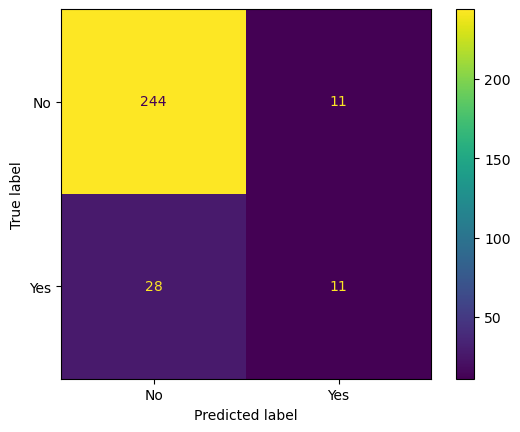

In [31]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=clf.classes_)
disp.plot()
#plt.show()

In [32]:
cohen_kappa_score(y_test, y_test_pred)

0.29300776914539406

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.90      0.96      0.93       255
         Yes       0.50      0.28      0.36        39

    accuracy                           0.87       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.84      0.87      0.85       294



## KNN Classifier

In [46]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(y_test_pred)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'

In [47]:
neigh.score(X_test, y_test)

0.8877551020408163

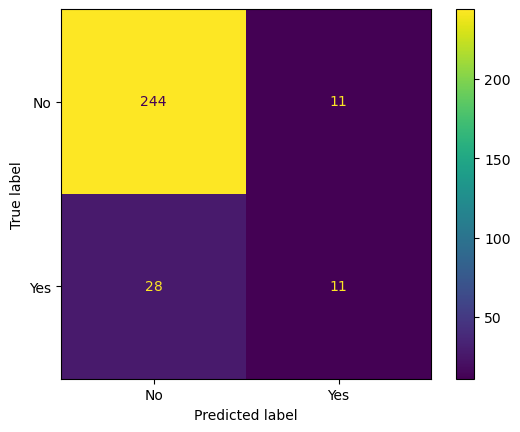

In [49]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=neigh.classes_)
disp.plot()
#plt.show()

In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.90      0.96      0.93       255
         Yes       0.50      0.28      0.36        39

    accuracy                           0.87       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.84      0.87      0.85       294



In [37]:
def plot_k(X_train, X_test, y_train, y_test, max_k=20):
    '''
    Creates a plot with the Accuracy-score on the y-axis and
    the k-value on th x-axis to determine the best k-value.
    
    Args:
        X_train: Independent variables of the training set
        X_test:  Dependent variables of the training set
        y_train: Independent variables of the test set
        y_test:  Dependent variable of the test set
        max_k:   Maximal k value to exermine
    '''
    
    scores = []
    
    for k in range(2,max_k+1):
        mod = KNeighborsClassifier(n_neighbors=k)
        mod.fit(X_train, y_train)
        score = mod.score(X_test, y_test)
        scores.append(score)
        
    plt.figure(figsize=(5,3))
    plt.plot(range(2, max_k+1), scores, color='blue',
            marker='o', markerfacecolor='red', markersize=10)
    plt.title('Accuracy vs. K-value')
    plt.xticks(range(1, max_k+1))
    plt.xlabel('k')
    plt.ylabel('Accuracy')

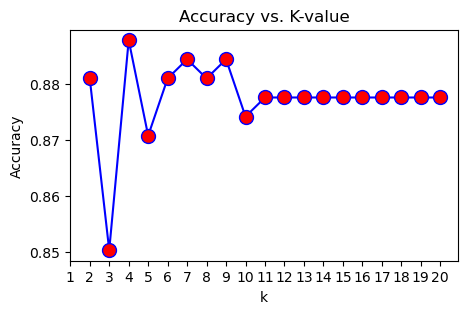

In [40]:
plot_k(X_train, X_test, y_train, y_test)

Minimum error:- 0.11224489795918367 at K = 3


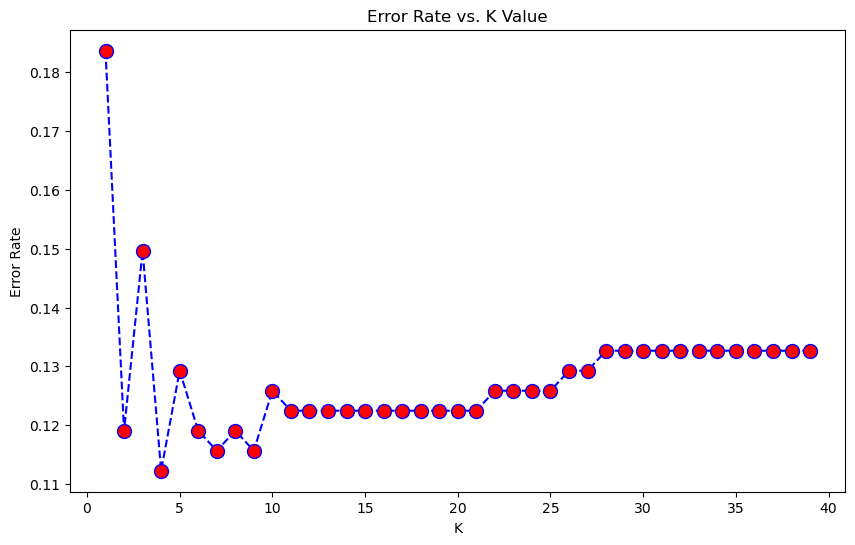

In [42]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

## Decision Tree Classifier

In [ ]:
# Balance date with imblearn
ros = RandomOverSampler(random_state=42)

X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))
print(y_train_over.value_counts())

In [ ]:
# compare Model results with balanced data